# D213 - Advanced Data Analytics
### Task 1: Time Series Modeling 
___

## Part I: Research Question

### A1: Proposal of Question

One research question that is relevant to the organizational situation that we hope to address in the following analysis is:
 - "With the first 2 years of daily revenue data, can a create a relatively reliable model for forecasting future revenues?" 

### A2: Objectives and Goals

The primary objective of this analysis is to study the daily revenue data and discover any underlying trends, seasonality, or other patterns are present. Following on from that, an additional goal is to create an ARIMA model that is reasonably accurate in the prediction of future daily revenues. 

## Part II: Method Justification

### B1: Summary of Assumptions

Time series modeling relies on a few assumptions:
 - **Stationarity** - The time series summary statistics such as ***mean*** and ***standard deviation*** as well as ***autocorrelation*** remain constant over time, there is ***no observable seasonality*** to the data, and if these properties exist, the data has been transformed so as to extract those elements proir to analysis
 - **Homoskedasticity** - The time series distribution and variance of errors remains relatively constant over time
 - **Univariate Data** - The time series consists of only one variable

## Part III: Data Preparation

### C1: Line Graph Visualization

In [2]:
# Import main packages and read in data
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller

df = pd.read_csv('./data/medical_time_series.csv')
df.head()

,Day,Revenue
0,1,0.000000
1,2,-0.292356
2,3,-0.327772
3,4,-0.339987
4,5,-0.124888


<AxesSubplot:title={'center':'Medical Admissions Revenue'}, xlabel='Time Horizon', ylabel='Revenue (in millions)'>

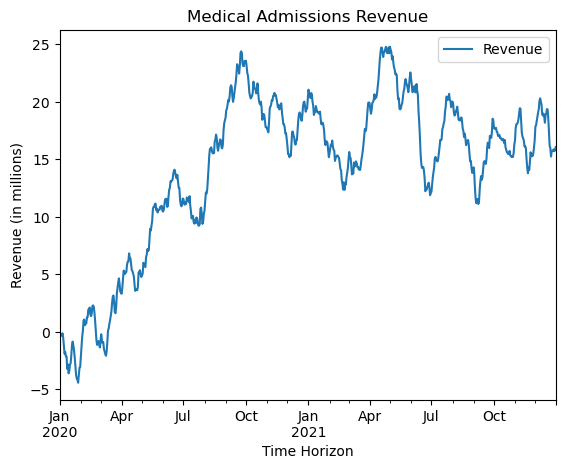

In [3]:
# Set datetime index and plot to line graph
df = df.set_index(pd.date_range(start='2020-1-1', periods=df.shape[0], freq='D'))
df.drop('Day', axis=1, inplace=True)
df.plot(title='Medical Admissions Revenue', ylabel='Revenue (in millions)', xlabel='Time Horizon')

### C2: Time Step Formatting

The time step formatting of the above time series is in `datetime` format. The frequency of the time series is **daily** and the total length is **731 days**.

### C3: Stationarity

We will begin by plotting the **rolling mean** of the raw dataset as an initial glimpse at stationarity.

<AxesSubplot:>

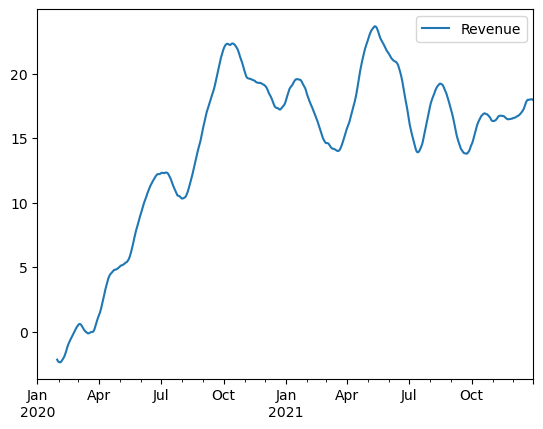

In [4]:
# Plot the rolling mean to check for stationarity
df.rolling(window=30).mean().plot()

It seems visually evident from the plot above that the data are not stationary. As further confirmation, we will next utilize the `Augmented Dickey-Fuller` test to evaluate the stationarity of the data.

In [5]:
# Evaluate the stationarity of time series data usin Augmented Dickey-Fuller and print results
def adf_test(ts):
    df = adfuller(ts, autolag='AIC')
    results = pd.DataFrame(df[:4], columns=['Results '], dtype=object)
    results.index=['Test Statistic', 'p-value', 'Num Lags', 'Num Observations']
    print('Results of Augmented Dickey-Fuller Test:\n\n', results)
    if df[1] <= 0.05:
        print('\nStrong evidence against the null hypothesis')
        print('Reject the null hypothesis')
        print('Data may have no unit root and is stationary')
    else:
        print('\nWeak evidence against the null hypothesis')
        print('Fail to reject the null hypothesis')
        print('Data may have a unit root and is non-stationary')

# Run the ADF test on the raw time series data
adf_test(df['Revenue'])

Results of Augmented Dickey-Fuller Test:

                   Results 
Test Statistic   -2.218319
p-value           0.199664
Num Lags               1.0
Num Observations     729.0

Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data may have a unit root and is non-stationary


With a non-statistically significant p-value at ~0.20, this is further evidence that the raw data are not stationary. We will now attempt to transform our time series by taking the first differences of the Revenue series so as to acheive stationarity.

<AxesSubplot:title={'center':'Differenced (Daily) Medical Admissions Revenue'}, xlabel='Time Horizon', ylabel='Revenue (in millions)'>

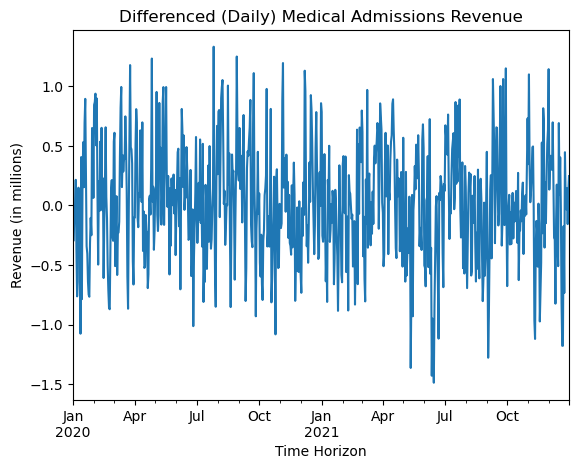

In [6]:
# Difference the time series and plot to line graph
df['Revenue_diff'] = df['Revenue'].diff()
df['Revenue_diff'].plot(title='Differenced (Daily) Medical Admissions Revenue', ylabel='Revenue (in millions)', xlabel='Time Horizon')

Visually, this appears to be more stationary. We'll now plot the rolling mean again to see if it remains relatively constant as opposed to the raw data.

<AxesSubplot:>

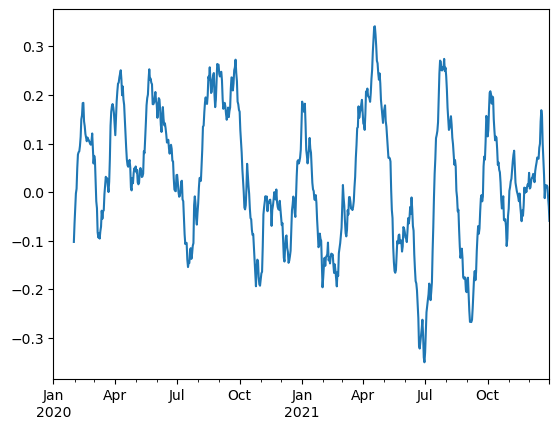

In [7]:
# Plot the differenced rolling mean to check for stationarity
df['Revenue_diff'].rolling(window=30).mean().plot()

In [8]:
# Test stationarity of the differenced time series using ADF
adf_test(df['Revenue_diff'].dropna())

Results of Augmented Dickey-Fuller Test:

                    Results 
Test Statistic   -17.374772
p-value                 0.0
Num Lags                0.0
Num Observations      729.0

Strong evidence against the null hypothesis
Reject the null hypothesis
Data may have no unit root and is stationary


It now appears we have acheived stationarity in our dataset. Next we'll look at seasonality and utilize the `auto_arima` tool to help us with that.

### C4: Steps to Prepare the Data

### C5: Prepared Dataset

## Part IV: Model Identification and Analysis

### D1: Report Findings and Visualizations

#### D1 a.: Seasonality 

In [9]:
# Import packages for ARIMA modeling using auto_arima
from pmdarima import auto_arima

arimafit = auto_arima(df['Revenue_diff'].dropna(), trace=True)
arimafit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=883.277, Time=0.50 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1015.972, Time=0.07 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=881.359, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=906.199, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1015.481, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=883.300, Time=0.10 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=883.314, Time=0.11 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=883.348, Time=0.29 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=879.982, Time=0.04 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=881.911, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=881.927, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=905.166, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=881.947, Time=0.14 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 1.524 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  730
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -437.991
Date:                Sun, 28 May 2023   AIC                            879.982
Time:                        14:51:48   BIC                            889.168
Sample:                    01-02-2020   HQIC                           883.526
                         - 12-31-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4142      0.034     12.258      0.000       0.348       0.480
sigma2         0.1943      0.011     17.842      0.000       0.173       0.216
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 1.92
Prob(Q):                              0.90   Prob(JB):                         0.38
Heteroskedasticity (H):               1.00   Skew:                            -0.02
Prob(H) (two-sided):                  0.97   Kurtosis:                         2.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

It appears that the optimal (p, d, q) parameters for our dataset are (1, 0, 0) which represents the best Akaike Information Criteria. Also, the above results suggest no seasonality in our dataset. We may proceed to fitting the model and generating our predictions.

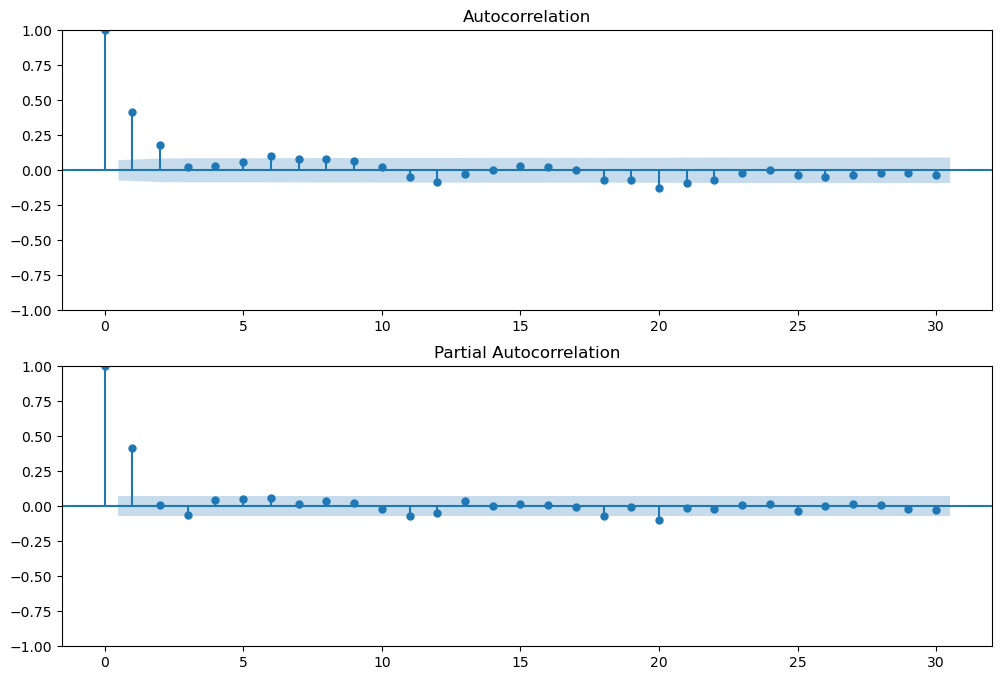

In [10]:
# Plot stationarity of the raw time series
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Plot stationarity of the diffed time series
diff_fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(df['Revenue_diff'].dropna(), ax=ax1, lags=30)
plot_pacf(df['Revenue_diff'].dropna(), ax=ax2, lags=30, method='ywm')
plt.show()


### D2: ARIMA Model

### D3: Forecasting Using ARIMA Model

### D4: Output and Calculations

### D5: Code

## Part V: Data Summary and Implications

### E1: Results

### E2: Annotated Visualization

### E3: Recommendations